In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Kuznets Curve for each Country

<h5>Data preparation

In [40]:
def process_dataframe(df):
    # Rename and remove empty values
    df = df.rename(columns={'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]': 'gdp',
                            'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]': 'co2'}).replace('..', np.nan).dropna()

    # Convert to numeric and apply log
    df[['gdp', 'co2']] = df[['gdp', 'co2']].apply(pd.to_numeric).apply(np.log)

    # Group by 3-year intervals
    df['year_group'] = df['Time'] // 3 * 3
    return df.groupby('year_group')[['gdp', 'co2']].mean().reset_index()

# Read file and process data for Canada
can = pd.read_csv('can.csv')
can_avr = process_dataframe(can)

# Read file and process data for China
chi = pd.read_csv('chi.csv')
chi_avr = process_dataframe(chi)

# Read file and process data for Australia
aus = pd.read_csv('aus.csv')
aus_avr = process_dataframe(aus)

<h5>Plot charts

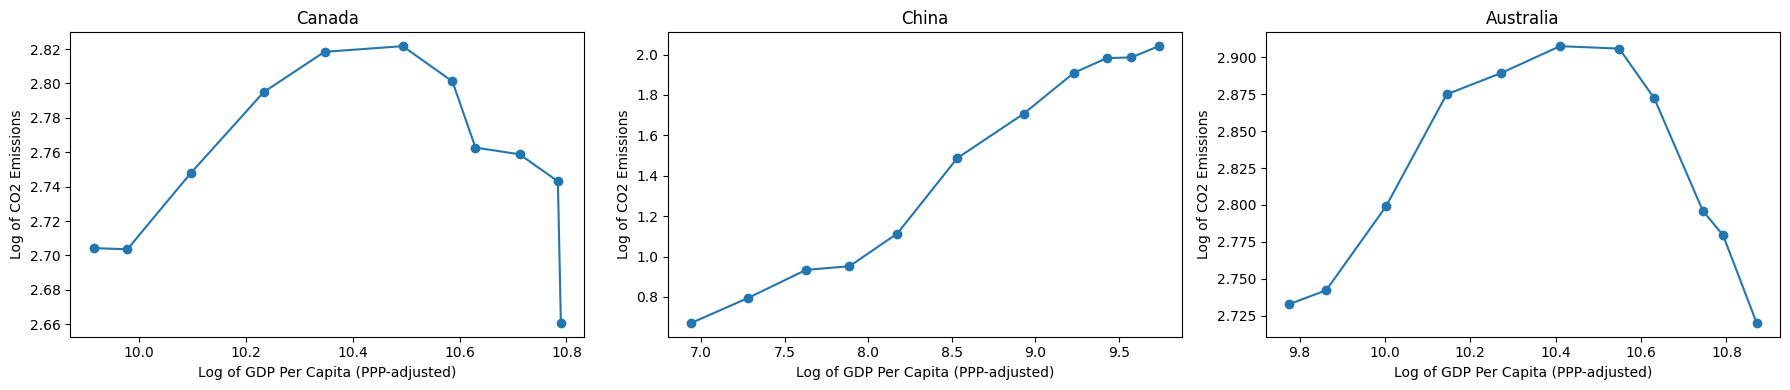

In [41]:
def scatter_plot(df, country_name):
    plt.scatter(df['gdp'], df['co2'])
    plt.plot(df['gdp'], df['co2'])
    plt.xlabel('Log of GDP Per Capita (PPP-adjusted)')
    plt.ylabel('Log of CO2 Emissions')
    plt.title(country_name)

# Create subplots
plt.figure(figsize=(18, 4))

# Plot for Canada
plt.subplot(1, 3, 1)
scatter_plot(can_avr, 'Canada')

# Plot for China
plt.subplot(1, 3, 2)
scatter_plot(chi_avr, 'China')

# Plot for Australia (Assuming aus_avr is defined somewhere in your code)
plt.subplot(1, 3, 3)
scatter_plot(aus_avr, 'Australia')

plt.tight_layout()
plt.show()


<h2>Kuznets Curve for 5 Countries<h2>

<h5>Data preparation

In [42]:
#read file
df_countries = pd.read_csv('countries_few.csv')

#rename and remove empty values
df_countries = df_countries.rename(columns={'Country Name' : 'country', 'Time' : 'time', 'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]' : 'gdp', 'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]' : 'co2'})
df_countries = df_countries.replace('..', np.nan).dropna()

#convert to numeric and apply log
cols = ['gdp', 'co2']
for col in cols:
    df_countries[col] = pd.to_numeric(df_countries[col])
    df_countries[col] = np.log(df_countries[col])

<h5>Plot charts

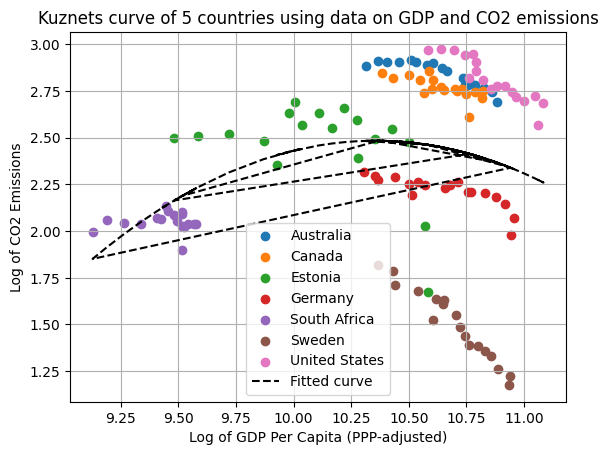

In [43]:
#group by country
for country in df_countries["country"].unique():
    plt.scatter(df_countries[df_countries["country"] == country]["gdp"], df_countries[df_countries["country"] == country]["co2"], label=country)

#assign axis
x = df_countries["gdp"]
y = df_countries["co2"]
p = np.polyfit(x, y, 2)
f = np.poly1d(p)
plt.plot(x, f(x), "k--", label="Fitted curve")

#labels
plt.xlabel("Log of GDP Per Capita (PPP-adjusted)")
plt.ylabel("Log of CO2 Emissions")
plt.title("Kuznets curve of 5 countries using data on GDP and CO2 emissions")
plt.legend()
plt.grid()

#show plot
plt.show()